# Home Loan Approval Project

## Objective :
* The aim of this project is to determine, given a set of parameters, whether a canditate is suitable to recieve a home loan on a given property.
* For this project, the dataset is provided by Kaggle. The link for the same is : https://www.kaggle.com/datasets/sazid28/home-loan.
* Thus, for this project, we consider the 'Target' to be predicted as the 'Loan Status' feature, that indicates whether a given canditate is dispensed the loan.
* The flow of the project is as follows : 
    * Perform exploratory data analysis on the data. This includes : 
        * Inspection of the data
        * Performing univariate and bivariate analysis
        * Visualizing the relationships between features
    * Using Feature Engineering to :
        * Analyse and choose informative features
        * Creating new features that might have stronger relationship
    * Data cleaning and preparation
        * Cleaning the data of any anomalies
        * Preparing the data for Machine Learning 
    * Using Machine Learning to : 
        * Determine the most optimal model for the task
        * Use the said model to predict the outcome.

### The dataset for the given problem is divided into two parts :
* Train
* Test

We will be using the 'Train' data to train the model and 'Test' data to predict the outcome status of the Loan approval

In [1]:
#We first import the necessary libraries for the tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv file and copying the data o that the original files remain unaltered
train = pd.read_csv('home-loan/train.csv').copy()
test = pd.read_csv('home-loan/test.csv').copy()

In [8]:
#We first inspect the data
df = pd.DataFrame(train)
print("The structure of the data frame : ", df.shape)
df.head()

The structure of the data frame :  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Thus we can conclude that our data has 13 columns and has 614 entries(rows)

In [13]:
#We can also get the statistical information regarding the dataframe and informatino about its columns
print("\nStatistical features of the data ",df.describe())
#We can also have information on its columns
print("\n")
print(df.info())


Statistical features of the data         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613

### Univariate analysis

As a part of univariate analysis, we analyse each column individually and its statistical properties

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
The percentage of men versus females applying for a home loan are : 
 Male      81.364393
Female    18.635607
Name: Gender, dtype: float64


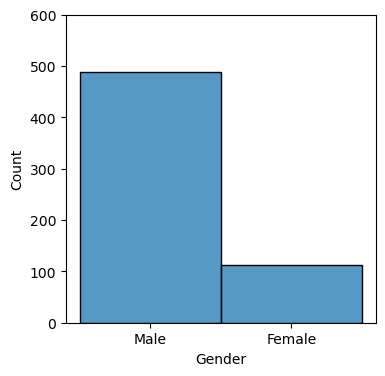

In [71]:
#Analysing gender
plt.figure(figsize=(4,4))
sns.histplot(data=df['Gender'])
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Gender.describe())
print("The percentage of men versus females applying for a home loan are : \n", df['Gender'].value_counts(normalize=True)*100)
plt.show()

The above graph indicates that far more number of males apply for a home loan that females

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


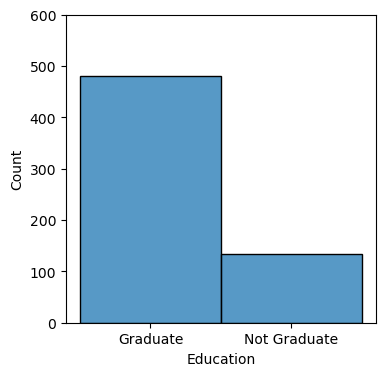

In [68]:
#Analysing Educational qualification
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Education')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Education.describe())
print(df.Education.value_counts())
plt.show()

This confirms that a lot more number of graduates are applying for loans. This might be because graduates are more likely to secure a regular income source.

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

The percentage of married versus unmarried people applying for a home loan are :
 Yes    65.139116
No     34.860884
Name: Married, dtype: float64


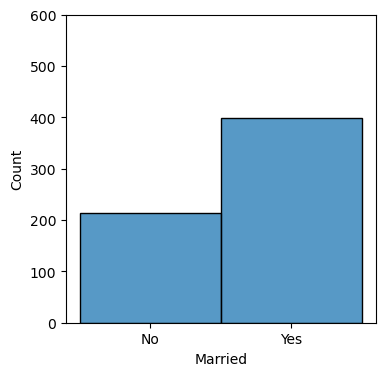

In [67]:
#Analysing Marriage status 
plt.figure(figsize=(4,4))
sns.histplot(data = df, x = 'Married')
plt.yticks(np.arange(start= 0, stop=700, step=100 ))
print(df.Married.describe())
print('\nThe percentage of married versus unmarried people applying for a home loan are :\n', df.Married.value_counts(normalize = True)*100)
plt.show()

This indicates that married people are almost twice as more likely to apply for a home loan than unmarried folks.